# Demo of Python : Simple matrix operations & Plotting

Author : Keith Hawkins (UT Austin)

Class : AST352K

Demo of Python

Date : Aug 25, 2022

## Learning goals
The purpose of this tutorial/demo is to introduce you to the basics of python that will be required to complete the various projects in this class. Here we will practice using arrays and lists, simple mathematical opportations, plotting, etc. 

Introduce the arrays and lists
Introduce simple plotting in 1-,2-d with matplotlib (e.g. x-y, histogram, histogram in 2d via hexbin)


We will start by loading in the nessisary libraries. Inside the libraries exists defintions (functions) that allow us to carry out what we want the code to do. 


Lets begin!

In [1]:
#lets make a plots interactive
%matplotlib inline 

#Importing libraries 
import numpy as np #numpy
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
from cycler import cycler

Styling plots: 
    Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.

In [2]:
#Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
p.rcParams['text.usetex']= True
p.rcParams['mathtext.fontset']= 'custom'
p.rcParams['mathtext.default']= 'rm'
p.rcParams['font.size']= 15.0
p.rcParams['axes.formatter.use_mathtext']=False
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

In [3]:
#lets define an array x such that it ranges from -20 to 20 with 0.1 step intervals 
x = np.arange(-20,20,0.1) #generates an array from -20 to 20 with step size

#what is in x?
print(x) #lets print x and see whats inside; 


[-2.00000000e+01 -1.99000000e+01 -1.98000000e+01 -1.97000000e+01
 -1.96000000e+01 -1.95000000e+01 -1.94000000e+01 -1.93000000e+01
 -1.92000000e+01 -1.91000000e+01 -1.90000000e+01 -1.89000000e+01
 -1.88000000e+01 -1.87000000e+01 -1.86000000e+01 -1.85000000e+01
 -1.84000000e+01 -1.83000000e+01 -1.82000000e+01 -1.81000000e+01
 -1.80000000e+01 -1.79000000e+01 -1.78000000e+01 -1.77000000e+01
 -1.76000000e+01 -1.75000000e+01 -1.74000000e+01 -1.73000000e+01
 -1.72000000e+01 -1.71000000e+01 -1.70000000e+01 -1.69000000e+01
 -1.68000000e+01 -1.67000000e+01 -1.66000000e+01 -1.65000000e+01
 -1.64000000e+01 -1.63000000e+01 -1.62000000e+01 -1.61000000e+01
 -1.60000000e+01 -1.59000000e+01 -1.58000000e+01 -1.57000000e+01
 -1.56000000e+01 -1.55000000e+01 -1.54000000e+01 -1.53000000e+01
 -1.52000000e+01 -1.51000000e+01 -1.50000000e+01 -1.49000000e+01
 -1.48000000e+01 -1.47000000e+01 -1.46000000e+01 -1.45000000e+01
 -1.44000000e+01 -1.43000000e+01 -1.42000000e+01 -1.41000000e+01
 -1.40000000e+01 -1.39000

In [4]:
#how many elements are in x?
print('There are %i elements in array x'%(len(x))) #lets print how many elements make up array x

There are 400 elements in array x


In [5]:
#lets define a new variable y such that y = x^2 NOTE ** is the same thing as power in python
y = x**2 

#lets also define a new parameter that is log(x) and log10(x)
y2 = np.log(x) #natural log
y3 = np.log10(x) #log base 10


#how many elements are in y
print('There are %i elements in array y'%(len(y))) #lets print how many elements make up array x

There are 400 elements in array y


<ipython-input-5-e680fa48d2ac>:5: RuntimeWarning: invalid value encountered in log
  y2 = np.log(x) #natural log
<ipython-input-5-e680fa48d2ac>:6: RuntimeWarning: invalid value encountered in log10
  y3 = np.log10(x) #log base 10


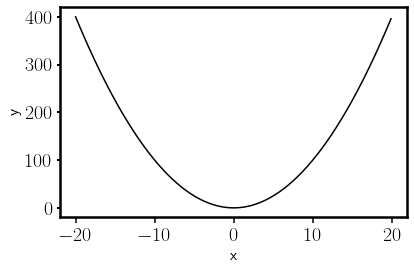

In [6]:
p.figure()
p.plot(x,y,ls='-',color='k') #black solid line of y vs x
p.xlabel('x')
p.ylabel('y')
p.tight_layout()

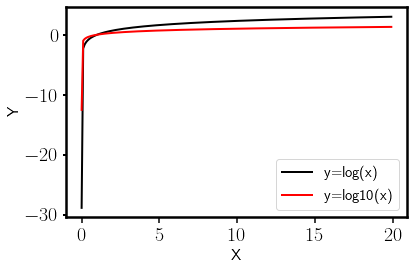

In [7]:
p.figure()
p.plot(x,y2,ls='-',color='k',label='y=log(x)',lw=2) #natural log (ln)
p.plot(x,y3,ls='-',color='r',label='y=log10(x)',lw=2) #log base 10
p.xlabel('X') ; p.ylabel('Y')
p.legend()
p.tight_layout()

what if we wanted to make a histogram of x ? 

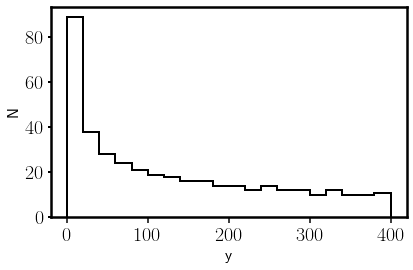

In [8]:
p.figure() #creating a figure
p.hist(y, histtype='step',lw=2,bins=20) #plotting the histogram
p.ylabel('N') #creating a ylabel
p.xlabel('y') #creating an x label 
p.tight_layout() #makes the figure "tight" so there arent alot of white spaces

Ok.. so now that we have constructed an array, preformed a mathematical opporation on it, and plotted the results, lets try something harder. Lets try to read in some actual Gaia Data using astropy and plots the on sky positions for the stars 

In [9]:
T = Table.read('./high_quality_gaia.fits') #lets read in the fits table this is downloaded from the Gaia archive upon the completion of the ADQL query 
T.colnames #this allows us to see the column names 



['source_id',
 'ra',
 'dec',
 'l',
 'b',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'bp_rp',
 'ag_gspphot',
 'azero_gspphot',
 'ebpminrp_gspphot',
 'has_rvs',
 'parallax_over_error',
 'radial_velocity']

In [10]:
T['ra'] #calling column ra 

274.03823198505614
274.27771116663604
274.50170677949245
274.35488241748374
274.2652202652083
276.8876609140014
276.8140700627627
277.014841049893
276.93704475699496
276.7523240629263
276.9716634131573


In this case, we want to make 2 plots (this is usually better when there are a large number of points): 1. a 2D histogram which shows the on sky location of the stars in RA/DEC (Equatorial Coordinates) 2. a 2-D histogram which shows the on sky location of the stars in l,b (Galactic Coordinates). 

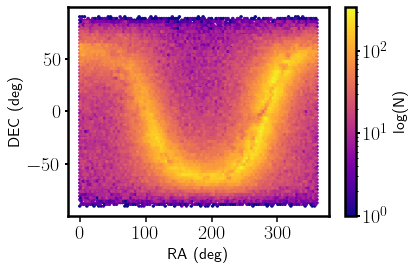

In [11]:
#----plot 1 Equatorial Coordinates------
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(T['ra'],T['dec'],bins='log', mincnt=1,cmap='plasma') #create a hexbin/2d histogram of ra,dec with log bins
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.xlabel('RA (deg)') #Ra x label
p.ylabel('DEC (deg)') # dec y label
p.tight_layout() #remove white spaces

#--------

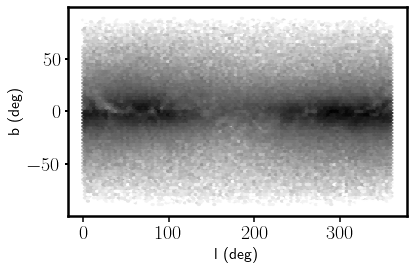

In [12]:
#----plot 2------
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot
p.hexbin(T['l'],T['b'],bins='log', mincnt=1,cmap='Greys') 
p.xlabel('l (deg)') #Ra x label
p.ylabel('b (deg)') #
p.tight_layout()

#--------

Lets transform this a little so that the l degree runs -180 to 180 to see the galaxy without the wrap around.
To do this, we need to find all galactic longitudes that are larger than 180 and subtract 360 deg from it. That way stars with longitudes of 360 degree will also be at 0. 

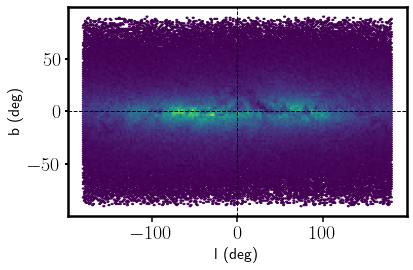

In [13]:
l = T['l']
l[np.where(l>= 180)] = l[np.where(l>= 180)]-360 #find all places where l >= 180 and subtract them by 360 deg
#----plot 2------
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot
p.hexbin(l,T['b'], mincnt=1,gridsize=150) 
p.xlabel('l (deg)') #Ra x label
p.ylabel('b (deg)') #
p.axhline(y=0,ls='--',color='k',lw=1)
p.axvline(x=0,ls='--',color='k',lw=1)
p.tight_layout()
#--------